In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
import numpy as np

In [7]:
iris = datasets.load_iris()

In [12]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [13]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
mapping_target = {0:"setosa",1:'versicolor',2:'virginica'}

In [15]:
df['target_name'] = df['target'].map(mapping_target)

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


## Applying PCA to reduce dimensionality

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
PCA_model = decomposition.PCA(n_components = 3)

In [22]:
X = PCA_model.fit_transform(df[df.columns[0:4]])

In [26]:
transformed_df = pd.concat([pd.DataFrame(X),df['target']],axis=1)

In [28]:
transformed_df.columns = ['var1','var2','var3','target']

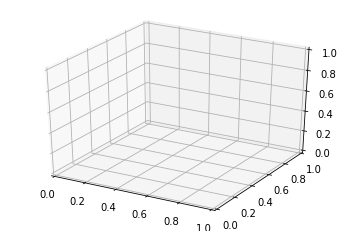

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [37]:
%matplotlib inline

No handles with labels found to put in legend.


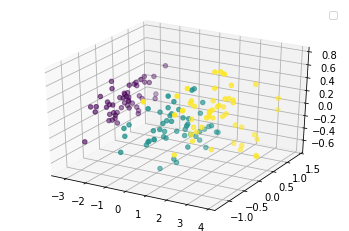

In [44]:
ax = plt.axes(projection='3d')
ax.scatter3D(transformed_df['var1'], transformed_df['var2'], transformed_df['var3'],c = transformed_df['target'])
ax.legend()
plt.show()